<a href="https://colab.research.google.com/github/taetae991202/Practice_sklearn/blob/main/%EB%B6%84%EB%A5%98%EB%82%98%EB%AC%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = [iris.target_names[x] for x in iris.target]

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
X = df.drop('species', axis = 1)
y = df['species']

In [6]:
clf = DecisionTreeClassifier(
            criterion='entropy', ## 'gini', 'log_loss'
            splitter='best', ## 'random'
            max_depth=3, ## '최대 깊이'
            min_samples_leaf=5, ## 최소 끝마디 샘플 수
            random_state=100
        )

In [7]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [12]:
print(clf.predict(X)[:5])

for i, col in enumerate(X.columns):
    print(f'{col} 중요도 : {clf.feature_importances_[i]}')

print(clf.get_params()) ## DecisionTreeClassifier 클래스 인자 설정 정보
print('정확도 : ', clf.score(X,y)) ## 성능 평가 점수(정확도 Accuracy)


['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
sepal length (cm) 중요도 : 0.0
sepal width (cm) 중요도 : 0.0
petal length (cm) 중요도 : 0.6881645055774848
petal width (cm) 중요도 : 0.3118354944225151
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 100, 'splitter': 'best'}
정확도 :  0.9733333333333334


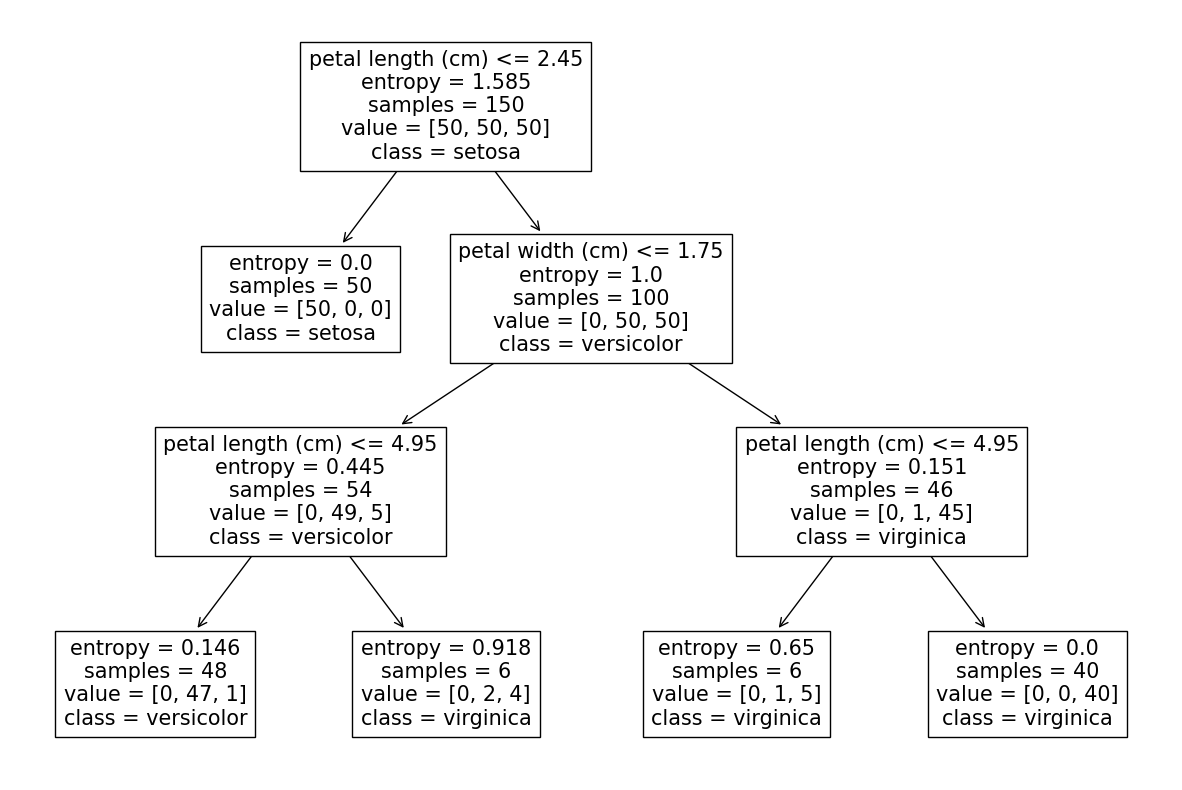

In [13]:
fig = plt.figure(figsize=(15, 10), facecolor='white')
plot_tree(clf,
          feature_names=X.columns, ## 박스에 변수 이름 표시
          class_names=clf.classes_, ## 클래스 이름(범주 이름)
         )
plt.show()

In [14]:
def get_info(dt_model, tree_type='clf'):
    tree = dt_model.tree_
    criterion = dt_model.get_params()['criterion']
    assert tree_type in ['clf', 'reg']
    num_node = tree.node_count
    info = []
    for i in range(num_node):
        temp_dict = dict()
        ## 각 정보들은 preorder 순서로 배열에 저장되어 있음.
        if tree.threshold[i] != -2: ## -2인 경우 끝마디이므로 질문이 없음
            split_feature = tree.feature[i]
            split_thres = tree.threshold[i]
            temp_dict['question'] = f'{split_feature} <= {split_thres:.3f}'

        impurity = tree.impurity[i] ## 불순도 값
        sample = tree.n_node_samples[i] ## 노드에 포함된 데이터 샘플 수
        value = tree.value[i]
        temp_dict['impurity'] = f'{criterion} = {impurity:.3f}' ## 불순도 측도, 불순도 값
        temp_dict['sample'] = sample
        temp_dict['value'] = value

        if tree_type == 'clf':
            classes = dt_model.classes_ ## 클래스 라벨
            idx = np.argmax(value) ## 예측라벨
            temp_dict['class'] = classes[idx]

        info.append(temp_dict)

    return info

In [15]:
get_info(clf)

[{'question': '2 <= 2.450',
  'impurity': 'entropy = 1.585',
  'sample': 150,
  'value': array([[50., 50., 50.]]),
  'class': 'setosa'},
 {'impurity': 'entropy = 0.000',
  'sample': 50,
  'value': array([[50.,  0.,  0.]]),
  'class': 'setosa'},
 {'question': '3 <= 1.750',
  'impurity': 'entropy = 1.000',
  'sample': 100,
  'value': array([[ 0., 50., 50.]]),
  'class': 'versicolor'},
 {'question': '2 <= 4.950',
  'impurity': 'entropy = 0.445',
  'sample': 54,
  'value': array([[ 0., 49.,  5.]]),
  'class': 'versicolor'},
 {'impurity': 'entropy = 0.146',
  'sample': 48,
  'value': array([[ 0., 47.,  1.]]),
  'class': 'versicolor'},
 {'impurity': 'entropy = 0.918',
  'sample': 6,
  'value': array([[0., 2., 4.]]),
  'class': 'virginica'},
 {'question': '2 <= 4.950',
  'impurity': 'entropy = 0.151',
  'sample': 46,
  'value': array([[ 0.,  1., 45.]]),
  'class': 'virginica'},
 {'impurity': 'entropy = 0.650',
  'sample': 6,
  'value': array([[0., 1., 5.]]),
  'class': 'virginica'},
 {'impuri